# Project - Exploring weather trends

## Contents
* [Project instructions](#Project-instructions)
* [Tooling](#Tooling)
* [Exploring weather trends](#Exploring-weather-trends)
    * [Fetching the data](#Fetching-the-data)
        * [Creating a MySQL connection to the existing database](#mysql-conn)
        * [SQL queries for fetching the data](#sql-queries)
        * [Fetching the data from the database using SQL queries](#fetch-from-db)
        * [Fetching the data from the CSV files](#fetch-from-csv)
    * [Exploring the data](#Exploring-the-data)
        * [city_list](#explore-city-list)
        * [global_data](#explore-global-data)
        * [city_data](#explore-city-data)
    * [Plotting the data](#Plotting-the-data)
        * [Average temperatures of Munich vs global](#plot-avg-temp)
        * [Moving average temperatures](#plot-moving-avg)
        * [Difference between moving average temperatures to global](#plot-temp-diff)
        * [Linear regression](#plot-linear-regression)
    * [Analyzing the data](#Analyzing-the-data)
        * [Average temperature difference](#analysis-temp-diff)
        * [Correlation](#analysis-corr)
        * [Observations](#observations)

## Tooling

The following programming languages and tools are used in this project:
* MySQL and SQL
* Jupyter notebook and python
* Libraries: pandas, matplotlib

## Project instructions

*source: Udacity nanodegree project description*

Your goal will be to create a visualization and prepare a write up describing the similarities and differences between global temperature trends and temperature trends in the closest big city to where you live. To do this, you’ll follow the steps below:

* Extract the data from the database. There's a workspace in the next section that is connected to a database. You’ll need to export the temperature data for the world as well as for the closest big city to where you live. You can find a list of cities and countries in the city_list table. To interact with the database, you'll need to write a SQL query.

    * Write a SQL query to extract the city level data. Export to CSV.
    * Write a SQL query to extract the global data. Export to CSV.
* Open up the CSV in whatever tool you feel most comfortable using. We suggest using Excel or Google sheets, but you are welcome to use another tool, such as Python or R.
* Create a line chart that compares your city’s temperatures with the global temperatures. Make sure to plot the moving average rather than the yearly averages in order to smooth out the lines, making trends more observable (the last concept in the previous lesson goes over how to do this in a spreadsheet).
* Make observations about the similarities and differences between the world averages and your city’s averages, as well as overall trends. Here are some questions to get you started.
    * Is your city hotter or cooler on average compared to the global average? Has the difference been consistent over time?
    * “How do the changes in your city’s temperatures over time compare to the changes in the global average?”
    * What does the overall trend look like? Is the world getting hotter or cooler? Has the trend been consistent over the last few hundred years?

## Exploring weather trends 

### Fetching the data

In order to fetch the data from the database, the following needs to be established:
* a database containing the data has to exist. 
    * if the database is not set, run the helper python script `setup_db.py` in `/data` which uses the exported data found in `.csv` to set it up
* create a connection to the database (in our case we used a MySQL database)
* define SQL queries for fetching the data
* run the SQL queries and load them into proper format (here we used Pandas DataFrames)
* alternatively, the data can be directly loaded from the exported `.csv` files - jump directly to 
[Fetching the data from the CSV files](#fetch-from-csv)

#### Creating a MySQL connection to the existing database named 'mydatabase' <a class="anchor" id="mysql-conn"></a>

In [14]:
import MySQLdb

db_host = 'localhost'
db_username = 'root'
db_password = 'password'
db_name = 'mydatabase'

mysql_conn = MySQLdb.connect(host = db_host,  
                             user = db_username, 
                             passwd= db_password, 
                             db = db_name)

if (mysql_conn):
    # connection succesful
    print("Successfully connected to '%s/%s'" % (db_host, db_name))
else:
    # connection unsuccesful
    print("Connection unsuccessful")

Successfully connected to 'localhost/mydatabase'


#### SQL queries for fetching the data <a class="anchor" id="sql-queries"></a>

SQL query for fetching the `global_data`
~~~~sql
SELECT * FROM global_data
~~~~

SQL query for fetching all `city_data`
~~~~sql
SELECT * FROM city_data
~~~~
or for a specific city, e.g.
~~~~sql
SELECT * FROM city_data 
WHERE city = 'Munich'
~~~~

(optional) SQL query for fetching the `city_list` data
~~~~sql
SELECT * FROM city_list
~~~~

In [15]:
# define SQL queries
global_data_sql_query = "SELECT * from global_data"
city_data_sql_query = "SELECT * from city_data"
city_list_sql_query = "SELECT * from city_list"

#### Fetching the data from the database using SQL queries  <a class="anchor" id="fetch-from-db"></a>

In [16]:
import pandas as pd

# load the data from the db into panda Dataframes
global_data = pd.read_sql_query(global_data_sql_query, mysql_conn)
city_data = pd.read_sql_query(city_data_sql_query, mysql_conn)
city_list = pd.read_sql_query(city_list_sql_query, mysql_conn)

print("Loaded a dataframe with %s records" % len(global_data))
print("Loaded a dataframe with %s records" % len(city_data))
print("Loaded a dataframe with %s records" % len(city_list))

mysql_conn.close()

Loaded a dataframe with 266 records
Loaded a dataframe with 71311 records
Loaded a dataframe with 345 records


#### Fetching the data from the CSV files <a class="anchor" id="fetch-from-csv"></a>

Alternatively, the data can be directly loaded from the `.csv` files, if available.

In [17]:
global_data_csv = pd.read_csv('data/global_data.csv')
city_data_csv = pd.read_csv('data/city_data.csv')
city_list_csv = pd.read_csv('data/city_list.csv')

A simple sanity check confirms the data being loaded from the database and the CSV files is the same

In [18]:
city_data.info()
city_data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71311 entries, 0 to 71310
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      71311 non-null  int64  
 1   city      71311 non-null  object 
 2   country   71311 non-null  object 
 3   avg_temp  68764 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71311 entries, 0 to 71310
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      71311 non-null  int64  
 1   city      71311 non-null  object 
 2   country   71311 non-null  object 
 3   avg_temp  68764 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.2+ MB


Either way of obtaining the data works.

### Exploring the data 

Once the data is fetched from the database/other data formats, some basic checks on the obtained data can performed such as checking the size, or checking for missing values to understand what is it that are having as an input.

##### `city_list` data <a class="anchor" id="explore-city-list"></a>

Let's start with the simplest data `city_list`

In [19]:
city_list.head()

,city,country
0,Abidjan,Côte D'Ivoire
1,Abu Dhabi,United Arab Emirates
2,Abuja,Nigeria
3,Accra,Ghana
4,Adana,Turkey


As it can be seen, the data contains rows with a unique ID and corresponding city and country pair.

As we will later see, `global_data` contains exactly the same information so there is no specific usage of this dataset except for an easier/quicker check if the city of our interest is contained in the database at all. 

In [20]:
city_list[city_list["city"] == "Munich"]

,city,country
214,Munich,Germany


which is equivalent to the SQL query
~~~~sql
SELECT * FROM city_list
WHERE city = 'Munich'
~~~~

As it can be seen, the city our interest is contained in the dataset and we can peform with the analysis.

Furthermore, we can easily check some other cities in Germany which could also be used for the comparison.

In [21]:
city_list[city_list["country"] == "Germany"]

,city,country
42,Berlin,Germany
113,Hamburg,Germany
214,Munich,Germany


##### `global_data` data <a class="anchor" id="explore-global-data"></a>

Then, let us check what is contained the `global_data` dataset. 

In [22]:
global_data.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


As it can be seen above, we again have rows of data containing an unique ID and pairs of years and average temperature in °C.

Let us see some min, max values of each. 

In [23]:
print('Year ranges:')
print('min(global_data[year]) = %s' % min(global_data['year']))
print('max(global_data[year]) = %s' % max(global_data['year']))

print('\nAverage temperature ranges:')
print('min(global_data[avg_temp]) = %s °C' % min(global_data['avg_temp']))
print('max(global_data[avg_temp]) = %s °C' % max(global_data['avg_temp']))

Year ranges:
min(global_data[year]) = 1750
max(global_data[year]) = 2015

Average temperature ranges:
min(global_data[avg_temp]) = 5.78 °C
max(global_data[avg_temp]) = 9.83 °C


Taking a look above, `global_data` contains average temperatures for years ranging from 1750 up to 2015. 

At the end, let us do a simple check to verify we have an entry of `avg_temp` for each of the corresponding year.

In [24]:
print("There are %s entries of global temperature averages in 'global_data'" % len(global_data['year']))
print("Among those, %s are NaN" % global_data['avg_temp'].isna().sum())

There are 266 entries of global temperature averages in 'global_data'
Among those, 0 are NaN


##### `city_data` data <a class="anchor" id="explore-city-data"></a>

Lastly, let us quickly take a look what is contained in `city_data`. 

In [25]:
city_data.head()

,year,city,country,avg_temp
0,1849,Abidjan,Côte D'Ivoire,25.58
1,1850,Abidjan,Côte D'Ivoire,25.52
2,1851,Abidjan,Côte D'Ivoire,25.67
3,1852,Abidjan,Côte D'Ivoire,NaN
4,1853,Abidjan,Côte D'Ivoire,NaN


As expected, `city_data` contains entries containing a year, city, country and average temperatures values.

From the first look, it appears that some values are empty.

In [26]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71311 entries, 0 to 71310
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      71311 non-null  int64  
 1   city      71311 non-null  object 
 2   country   71311 non-null  object 
 3   avg_temp  68764 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.2+ MB


Let us focus on our point of interest and select all temperatures for Munich

In [27]:
munich_data = city_data[city_data["city"] == "Munich"].copy()
munich_data.head()

,year,city,country,avg_temp
43994,1743,Munich,Germany,1.32
43995,1744,Munich,Germany,6.09
43996,1745,Munich,Germany,-2.15
43997,1746,Munich,Germany,NaN
43998,1747,Munich,Germany,NaN


In [28]:
print("There are %s entries for Munich in 'city_data'" % len(munich_data['year']))
print("Among those, %s are NaN" % munich_data['avg_temp'].isna().sum())

There are 271 entries for Munich in 'city_data'
Among those, 4 are NaN


As it can be seen above, out of 271 entries for Munich, we have 4 that are empty.

In [29]:
munich_data[munich_data["avg_temp"].isna()]

,year,city,country,avg_temp
43997,1746,Munich,Germany,NaN
43998,1747,Munich,Germany,NaN
43999,1748,Munich,Germany,NaN
44000,1749,Munich,Germany,NaN


We can visually see that the missing data is for the years 1746-1749.  

In [30]:
print('Year ranges:')
print('min(munich_data[year]) = %s' % min(munich_data['year']))
print('max(munich_data[year]) = %s' % max(munich_data['year']))

print('\nAverage temperature ranges:')
print('min(munich_data[avg_temp]) = %s °C' % min(munich_data['avg_temp']))
print('max(munich_data[avg_temp]) = %s °C' % max(munich_data['avg_temp']))

Year ranges:
min(munich_data[year]) = 1743
max(munich_data[year]) = 2013

Average temperature ranges:
min(munich_data[avg_temp]) = -2.15 °C
max(munich_data[avg_temp]) = 6.64 °C


In addition to containing empty values for years 1746-1749, the last recorded year of the Munich dataset is 2013, in contrast to 2015 for global average temparature. 

We can also visualize the missing values using the `missigno` library.

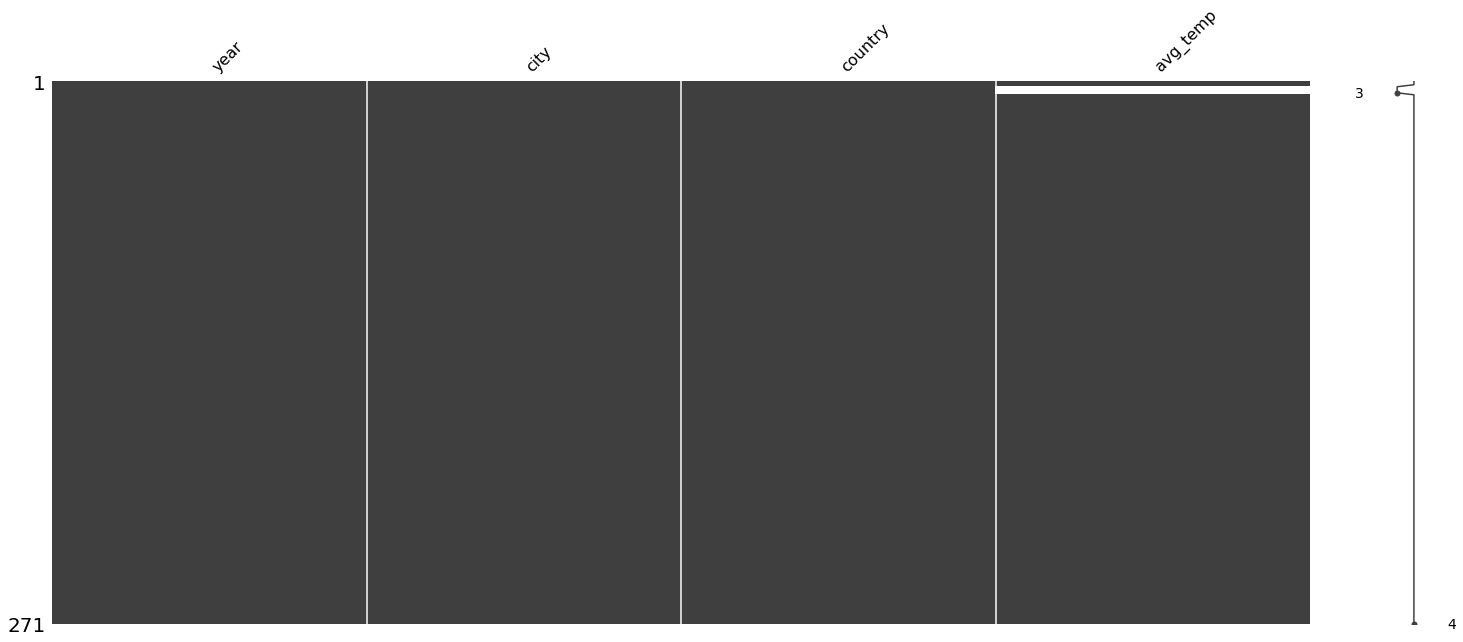

In [31]:
import missingno as miss 

miss.matrix(munich_data);

As the limitted data for years 1746-1749 years is available, for simplicity we will just reduce the scope of our analysis for the range from 1750 to 2015 as it will not have a great impact on the analysis.

In [32]:
range_start = 1750
range_end = 2015

# remove the unnecessary data beyond the range
munich_data = munich_data.loc[(munich_data.year >= range_start) & (munich_data.year <= range_end)].copy()
global_data = global_data.loc[(global_data.year >= range_start) & (global_data.year <= range_end)].copy()

### Plotting the data

#### Average temperatures of Munich vs global <a class="anchor" id="plot-avg-temp"></a>

For the start, let us simply plot the raw Munich and global temperatures data.
Furthermore, let us denote the range of years we shall focus the analysis on. 

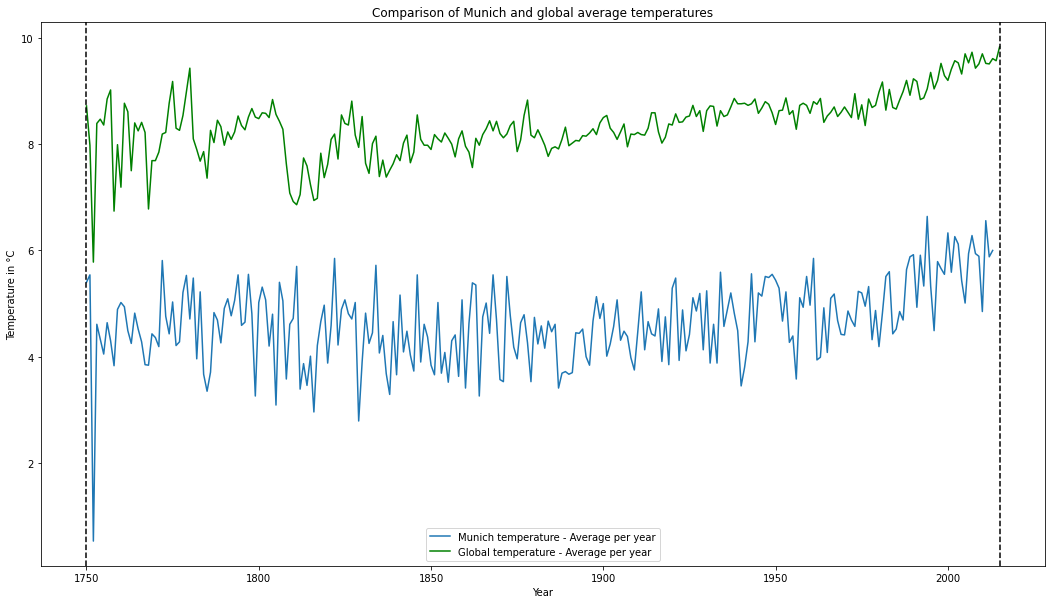

In [33]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [18, 10]
ax = plt.gca()

munich_data.plot(x="year", y="avg_temp", ax=ax)
global_data.plot(x="year", y="avg_temp", color='green', ax=ax)

plt.axvline(x=range_start, ymin=0, ymax=1, color='black', linestyle='--')
plt.axvline(x=range_end, ymin=0, ymax=1, color='black', linestyle='--')

plt.title('Comparison of Munich and global average temperatures')
plt.xlabel("Year");
plt.ylabel("Temperature in °C");
plt.legend(["Munich temperature - Average per year",
           "Global temperature - Average per year",
          ]);

#### Moving average temperatures <a class="anchor" id="plot-moving-avg"></a>

As seen above, the yearly averages differ significantly between different years. To make temperature trends more observable, let us calculate the moving averages to smoothen out the lines.

In [34]:
moving_avg_year_range = 10 # in years

munich_data["moving_avg_temp"] = munich_data["avg_temp"].rolling(window = moving_avg_year_range).mean()
global_data["moving_avg_temp"] = global_data["avg_temp"].rolling(window = moving_avg_year_range).mean()

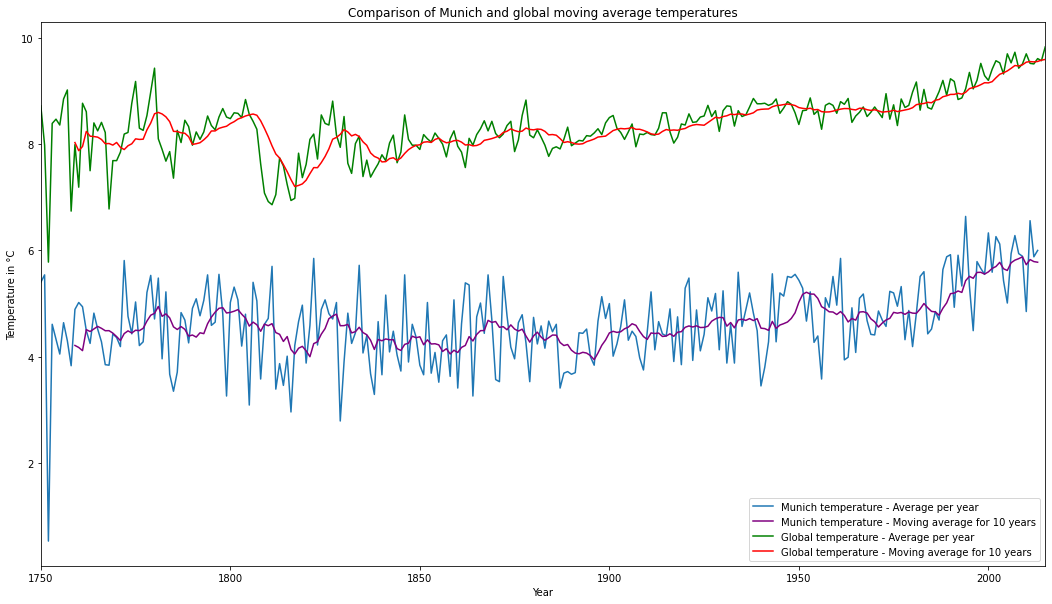

In [35]:
plt.rcParams['figure.figsize'] = [18, 10]
ax = plt.gca()

munich_data.plot(x="year", y="avg_temp", ax=ax)
munich_data.plot(kind='line',x='year',y='moving_avg_temp', color='purple', ax=ax)

global_data.plot(x="year", y="avg_temp", color='green', ax=ax)
global_data.plot(kind='line',x='year',y='moving_avg_temp', color='red', ax=ax)

plt.xlim(range_start, range_end)
plt.title('Comparison of Munich and global moving average temperatures')
plt.xlabel("Year");
plt.ylabel("Temperature in °C");
ax.legend(["Munich temperature - Average per year",
           "Munich temperature - Moving average for 10 years",
           "Global temperature - Average per year",
           "Global temperature - Moving average for 10 years",
          ]);


#### Difference between moving average temperatures to global <a class="anchor" id="plot-temp-diff"></a>

In [36]:
moving_avg_temp_diff = munich_data[munich_data['year'] > range_start+moving_avg_year_range]

# remove unnecessary columns, keep only year and moving_avg_temp
moving_avg_temp = moving_avg_temp_diff.loc[: , [True, False, False, False, True]]

# reset index so that it goes from 0
moving_avg_temp = moving_avg_temp.reset_index(drop=True)

#rename column
moving_avg_temp  = moving_avg_temp.rename({'moving_avg_temp':'munich_moving_avg_temp'}, axis=1)

# add global_moving_avg_temp
global_moving_avg_temp = global_data[global_data['year'] > range_start+moving_avg_year_range]
global_moving_avg_temp = global_moving_avg_temp.loc[: , [False, False, True]]
global_moving_avg_temp = global_moving_avg_temp.reset_index(drop=True)

# add to the original DataFrame
moving_avg_temp['global_moving_avg_temp'] = global_moving_avg_temp

# calculate the difference between Munich and global temperatures
moving_avg_temp['diff_to_global'] = moving_avg_temp['global_moving_avg_temp']-moving_avg_temp['munich_moving_avg_temp']

moving_avg_temp.head()

,year,munich_moving_avg_temp,global_moving_avg_temp,diff_to_global
0,1761,4.114,7.956,3.842
1,1762,4.510,8.239,3.729
2,1763,4.474,8.150,3.676
3,1764,4.523,8.143,3.620
4,1765,4.570,8.132,3.562


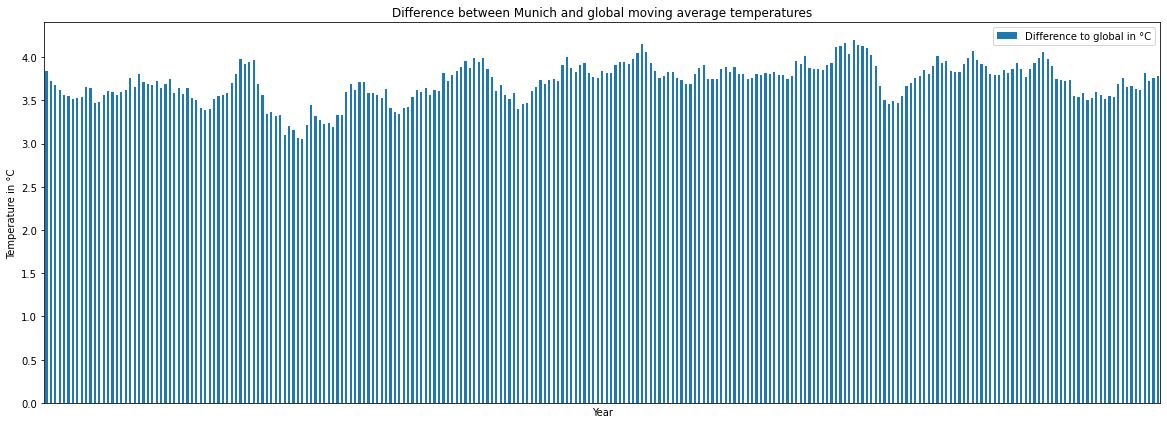

In [37]:
ax = moving_avg_temp.plot(x="year", y="diff_to_global", kind='bar', figsize=(20,7), title='Difference between Munich and global moving average temperatures')
ax.set_xticks([])
ax.set_xlabel("Year");
ax.set_ylabel("Temperature in °C");
ax.legend(["Difference to global in °C"]);

#### Linear regression <a class="anchor" id="plot-linear-regression"></a>

We can perform linear regression to define a model/a function best explaining our data. Year to global and Munich average temperatures data can be used for fitting and deducting a simple 1st linear function. 

Firstly we will fit the data for all year ranges from 1750. Then we will focus on the data from 1900 and 1970 to make the fit more suitable for the trends evident in the data.

In [38]:
import numpy as np

order = 1

# Munich data
munich_fit = np.polyfit(moving_avg_temp['year'], moving_avg_temp['munich_moving_avg_temp'], order)
munich_temp_fit_func = np.poly1d(munich_fit)

munich_fit_history_fit = munich_temp_fit_func(moving_avg_temp['year'].to_numpy())

munich_fit_history = pd.DataFrame(moving_avg_temp['year'], columns=['year'])
munich_fit_history['fit'] = munich_fit_history_fit

# global data
global_fit = np.polyfit(moving_avg_temp['year'], moving_avg_temp['global_moving_avg_temp'], order)
global_temp_fit_func = np.poly1d(global_fit)

global_fit_history_fit = global_temp_fit_func(moving_avg_temp['year'].to_numpy())

global_fit_history = pd.DataFrame(moving_avg_temp['year'], columns=['year'])
global_fit_history['fit'] = global_fit_history_fit

# from 1900 

# global data
fit_year_start = 1900
x_input = moving_avg_temp[moving_avg_temp['year']>fit_year_start]['year']
y_input = moving_avg_temp[moving_avg_temp['year']>fit_year_start]['global_moving_avg_temp']
global_fit_last_100 = np.polyfit(x_input, y_input, order)
global_temp_fit_func_last_100 = np.poly1d(global_fit_last_100)

global_fit_history_fit_last_100 = global_temp_fit_func_last_100(moving_avg_temp[moving_avg_temp['year']>fit_year_start]['year'].to_numpy())
global_fit_history_last_100 = pd.DataFrame(moving_avg_temp[moving_avg_temp['year']>fit_year_start], columns=['year'])
global_fit_history_last_100['fit'] = global_fit_history_fit_last_100

# from 1970
fit_year_start = 1970
x_input = moving_avg_temp[moving_avg_temp['year']>fit_year_start]['year']
y_input = moving_avg_temp[moving_avg_temp['year']>fit_year_start]['global_moving_avg_temp']
global_fit_last_50 = np.polyfit(x_input, y_input, order)
global_temp_fit_func_last_50 = np.poly1d(global_fit_last_50)

global_fit_history_fit_last_50 = global_temp_fit_func_last_50(moving_avg_temp[moving_avg_temp['year']>fit_year_start]['year'].to_numpy())
global_fit_history_last_50 = pd.DataFrame(moving_avg_temp[moving_avg_temp['year']>fit_year_start], columns=['year'])
global_fit_history_last_50['fit'] = global_fit_history_fit_last_50



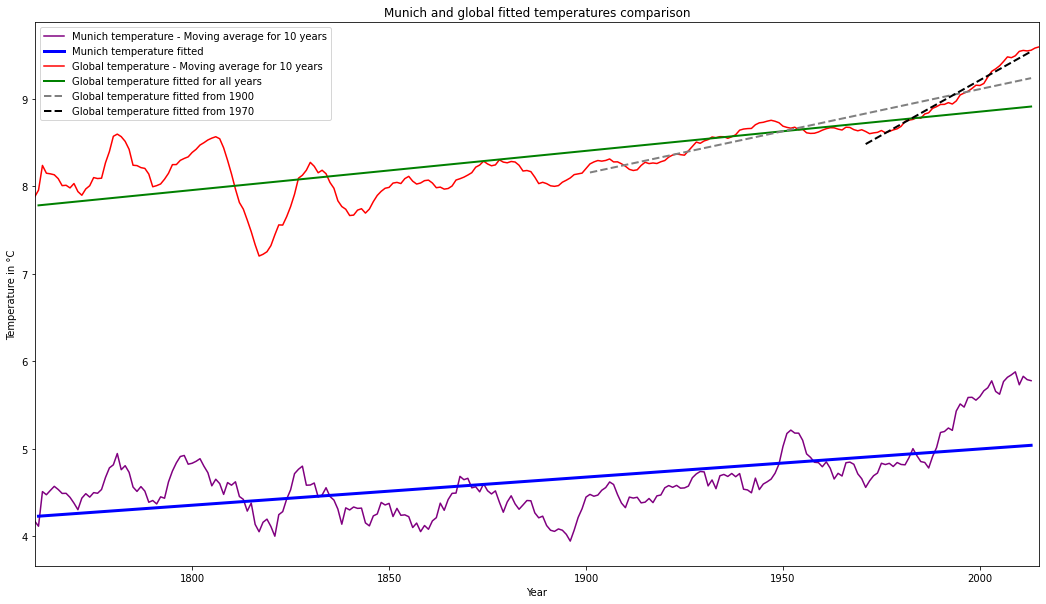

In [39]:
plt.rcParams['figure.figsize'] = [18, 10]
ax = plt.gca()

munich_data.plot(x="year", y="moving_avg_temp", color='purple', ax=ax)
munich_fit_history.plot(x="year", y="fit", color='blue', linewidth=3.0, ax=ax)

ax = global_data.plot(x="year", y="moving_avg_temp", color='red', ax=ax)
ax = global_fit_history.plot(x="year", y="fit", color='green', linewidth=2.0, ax=ax)

ax = global_fit_history_last_100.plot(x="year", y="fit", color='gray', linestyle='--', linewidth=2.0, ax=ax)
ax = global_fit_history_last_50.plot(x="year", y="fit", color='black', linestyle='--', linewidth=2.0, ax=ax)

plt.title('Munich and global fitted temperatures comparison')
plt.xlim(range_start+moving_avg_year_range, range_end)
ax.set_xlabel("Year");
ax.set_ylabel("Temperature in °C");
ax.legend(["Munich temperature - Moving average for 10 years",
           "Munich temperature fitted",
           "Global temperature - Moving average for 10 years",
           "Global temperature fitted for all years",
           "Global temperature fitted from 1900",
           "Global temperature fitted from 1970",
          ]);

### Temperature prediction

Having performed a simple linear regression, we deducted a 1st order linear function describing the data. The function can be then straightforwardly used to predict the future trends.  

In [40]:
# using the fitted data for all years

# temperature in 2050
prediction_year = 2050
print(f'Predicted global average temperature in 2050 will be {global_temp_fit_func(prediction_year):2.2f} °C')
print(f'Predicted Munich average temperature in 2050 will be {munich_temp_fit_func(prediction_year):2.2f} °C\n')

# temperature in 2100
prediction_year = 2100
print(f'Predicted global average temperature in 2100 will be {global_temp_fit_func(prediction_year):2.2f} °C')
print(f'Predicted Munich average temperature in 2100 will be {munich_temp_fit_func(prediction_year):2.2f} °C\n')

# using the fitted data from 1900
print(f'Predicted global average temperature in 2050 using trends from 1900 will be {global_temp_fit_func_last_100(2050):2.2f} °C')
print(f'Predicted global average temperature in 2100 using trends from 1900 will be {global_temp_fit_func_last_100(2100):2.2f} °C\n')

# using the fitted data from 1970
print(f'Predicted global average temperature in 2050 using trends from 1970 will be {global_temp_fit_func_last_50(2050):2.2f} °C')
print(f'Predicted global average temperature in 2100 using trends from 1970 will be {global_temp_fit_func_last_50(2100):2.2f} °C')


Predicted global average temperature in 2050 will be 9.08 °C
Predicted Munich average temperature in 2050 will be 5.16 °C

Predicted global average temperature in 2100 will be 9.30 °C
Predicted Munich average temperature in 2100 will be 5.32 °C

Predicted global average temperature in 2050 using trends from 1900 will be 9.59 °C
Predicted global average temperature in 2100 using trends from 1900 will be 10.08 °C

Predicted global average temperature in 2050 using trends from 1970 will be 10.47 °C
Predicted global average temperature in 2100 using trends from 1970 will be 11.73 °C


### Analyzing the data

The temperature trends are visually observable. Let us calculate the average temperates of Munich and global and compare them quantitatively.

#### Average temperature difference <a class="anchor" id="analysis-temp-diff"></a>

In [41]:
avg_temp_munich = munich_data['avg_temp'].mean()
avg_temp_global = global_data['avg_temp'].mean()

print(f'Munich average temperature is {avg_temp_munich:2.2f} °C')
print(f'Global average temperature is {avg_temp_global:2.2f} °C')
print(f'Difference between global and Munich average temperature is {avg_temp_global-avg_temp_munich:2.2f} °C')

Munich average temperature is 4.64 °C
Global average temperature is 8.37 °C
Difference between global and Munich average temperature is 3.73 °C


#### Correlation  <a class="anchor" id="analysis-corr"></a>

In [42]:
from scipy.stats import pearsonr

# calculate Pearson's correlation
correlation, _ = pearsonr(moving_avg_temp['munich_moving_avg_temp'], moving_avg_temp['global_moving_avg_temp'])
print('Pearsons correlation: %.3f' % correlation)

Pearsons correlation: 0.873


The value of 0.873 denotes strong positive correlation between moving average temperatures of Munich and global temperatures.

#### Observations <a class="anchor" id="observations"></a>

Taking all of the analysis above the following can be concluded:
* Munich average temperature of 4.64 °C is lower than the global average temperature of 8.37 °C with a difference of 3.73 °C on average.
* Considering the [difference between moving average temperatures to global](#plot-temp-diff), the difference between Munich and global temperature has been fairly consistent throughout time ranging from 3.0 to 4.5 °C on particular years.
* The overall trend increases in a positive direction meaning that the global temperature increases with time. Likewise, Munich temperature exhibits the same upward trend.
* The temperature increase is particularly evident in the last 120 years (from 1900) as the increase has been significant. 
* As presented in [linear regression](#plot-linear-regression), taking a look at global temperature trends from 1970, the predicted global average temperature will be 10.47 °C in 2050 and 11.73 °C in 2100. 